# Problem Statement: 
Predicting the surviving of passengers sinking or not.

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

# Loading dataset

In [4]:
titanic = pd.read_csv('titanic.csv')

# Creating new Dataframe for titanic

In [5]:
df=pd.DataFrame(titanic)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Age & Fare is a Continous Variable
- Survival is the target variable where 1-Survived & 0- Not Survived.

In [6]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

- Above Col are dropped as they not significantly influencing target variable.
- Cabin is dropped as it has very high missing value.

In [7]:
df.shape

(891, 8)

- dataset has 891  observation & 8 Column

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- the  dataframe shows only influencing variables after unrelevant variable got dropped.

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

- Embarked & Sex are Object Datatype.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


- index 0 = Survived & Index 7 = Embarked.
- 2 float Variables.
- 4 Integer Variables.
- 2 Object Variables.
- 891 Rows.

# Count plot for Categorical Variables

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

- Correct Column name Displayed without any spaces present in col name. 

In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- 1- Survived
- 0 - Not Survived
- Class is imbalance which is treated later.

## Count plot

<AxesSubplot:xlabel='Survived', ylabel='count'>

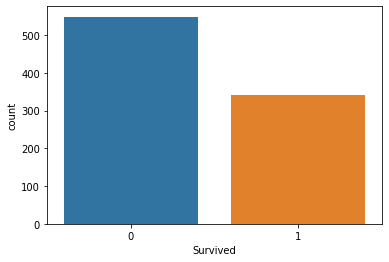

In [13]:
sns.countplot(df['Survived'])

- Target Col is Imbalance which is treated later.
- Survived passeger is less then not survived passenger.

In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Count plot

- Pclass Col has three unique valuies.
- where the count of value 1 is least & count of Value 3 is the highest.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

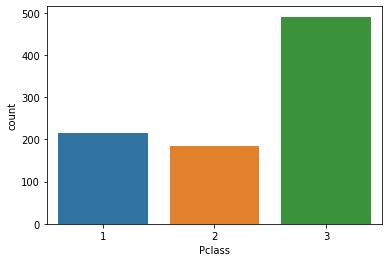

In [15]:
sns.countplot(df['Pclass'])

- Pclass Col has three unique valuies.
- where the count of value 1 is least & count of Value 3 is the highest.

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- Sex Column has two unique values.
- Male count is higher then female count in the dataset.

<AxesSubplot:xlabel='Sex', ylabel='count'>

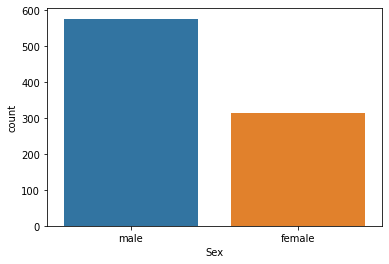

In [17]:
sns.countplot(df['Sex'])

- Sex Column has two unique values.
- Male count is higher then female count in the dataset.

In [18]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- SibSp has 5 unique values which represent No siblings & Spouses of the passenger aboard..
- 0 count is the highest 
- 5 count is the least

<AxesSubplot:xlabel='SibSp', ylabel='count'>

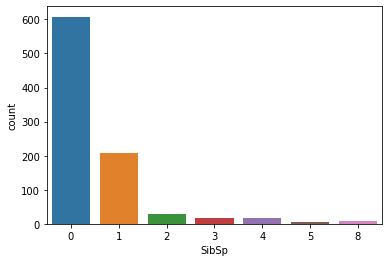

In [19]:
sns.countplot(df['SibSp'])

- SibSp has 5 unique values which represent No siblings & Spouses of the passenger aboard.
- 0 count is the highest 
- 5 count is the least

In [20]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- Parch Col represents No of Parents & Childrens of the passenger aboard.
- Where the count of 6 has only 1 which is the least.
- Count of 0 is the highest which is 678 means no parents & childrens of the passenger aboard present.
- There are 118 Obs which has 1 parents or children of the passenger aboard.
- There is 1 Obs which shows 6 no parents or childrens of passenger aboard.

<AxesSubplot:xlabel='Parch', ylabel='count'>

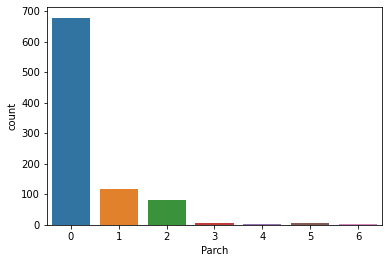

In [21]:
sns.countplot(df['Parch'])

- Parch Col represents No of Parents & Childrens of the passenger aboard.
- Where the count of 6 has only 1 which is the least.
- Count of 0 is the highest which is 678 means no parents & childrens of the passenger aboard present.
- There are 118 Obs which has 1 parents or children of the passenger aboard.
- There is 1 Obs which shows 6 no parents or childrens of passenger aboard.

In [22]:
lencode=LabelEncoder()
df['Embarked']=lencode.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


- As there are only two col which is categorical Sex & Embarked.
- In Above Embarked is Label encoded which can be seen above.

In [23]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


- Sex Col is Label encoded

In [24]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


- Age & Fare Col is Continous.
- High Diff between Max & 75th Percentile Seen in Parch Col & Age Col.
- Mean is Slightly greater then 50th Percentile in Age col
- Mean value is high then 50th Percentile as seen in Fare Col.
- std value is high in fare col.
- Age count shows 714 obs means there is missing value present in Age col.
- as per above obs Fare & Age Col has missing value, Skewness & outliers present.

# Missing Value

In [25]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

- Age col has miisng value

In [26]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

-Fare Col has very high positive skewness
-Remaing Col are Categorical hence skewness is not important.

# Histogram plot

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

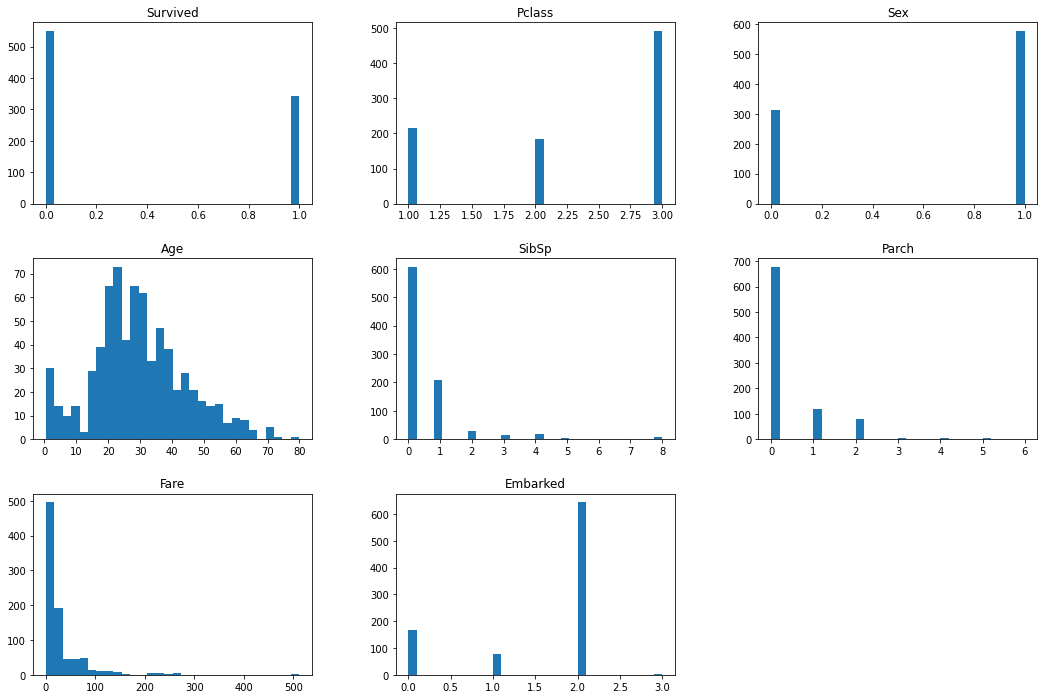

In [27]:
df.hist(grid=False, figsize=(18,12), bins=30)

-Fare Col has very high positive skewness
-Remaing Col are Categorical hence skewness is not important.

# Dissplot

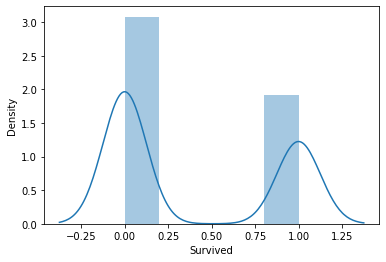

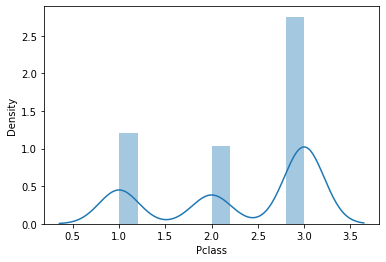

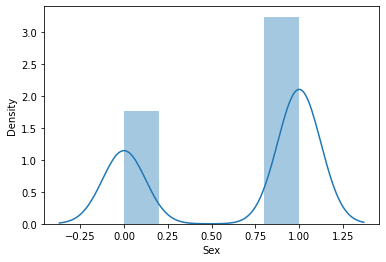

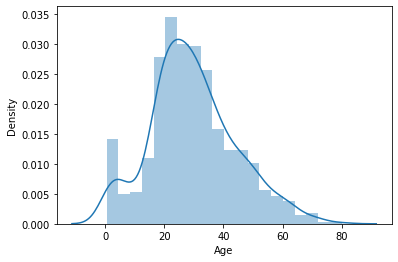

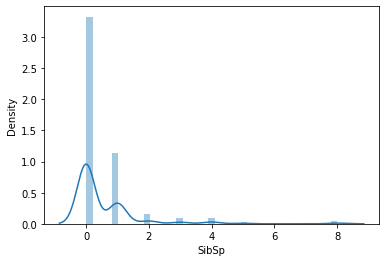

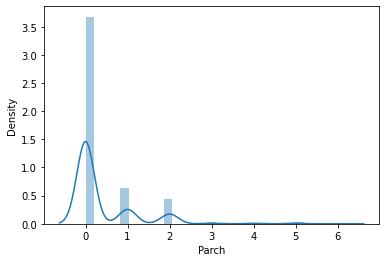

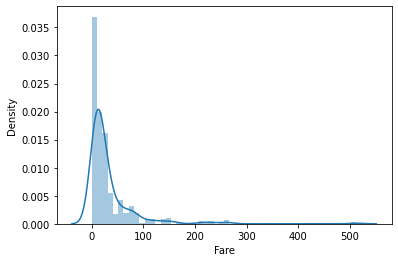

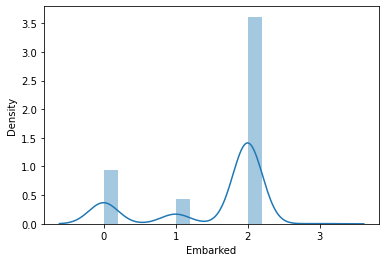

In [28]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- Fare has right skewed data.

In [29]:
df["Age"] = df["Age"].fillna(df["Age"].mean()) # As age data is falling under normal range of 0.5 & -0.5 so mean is used

In [30]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()) # Mode as Embarked is Cat Variable.

In [31]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

- No Missing Value After Treatment.

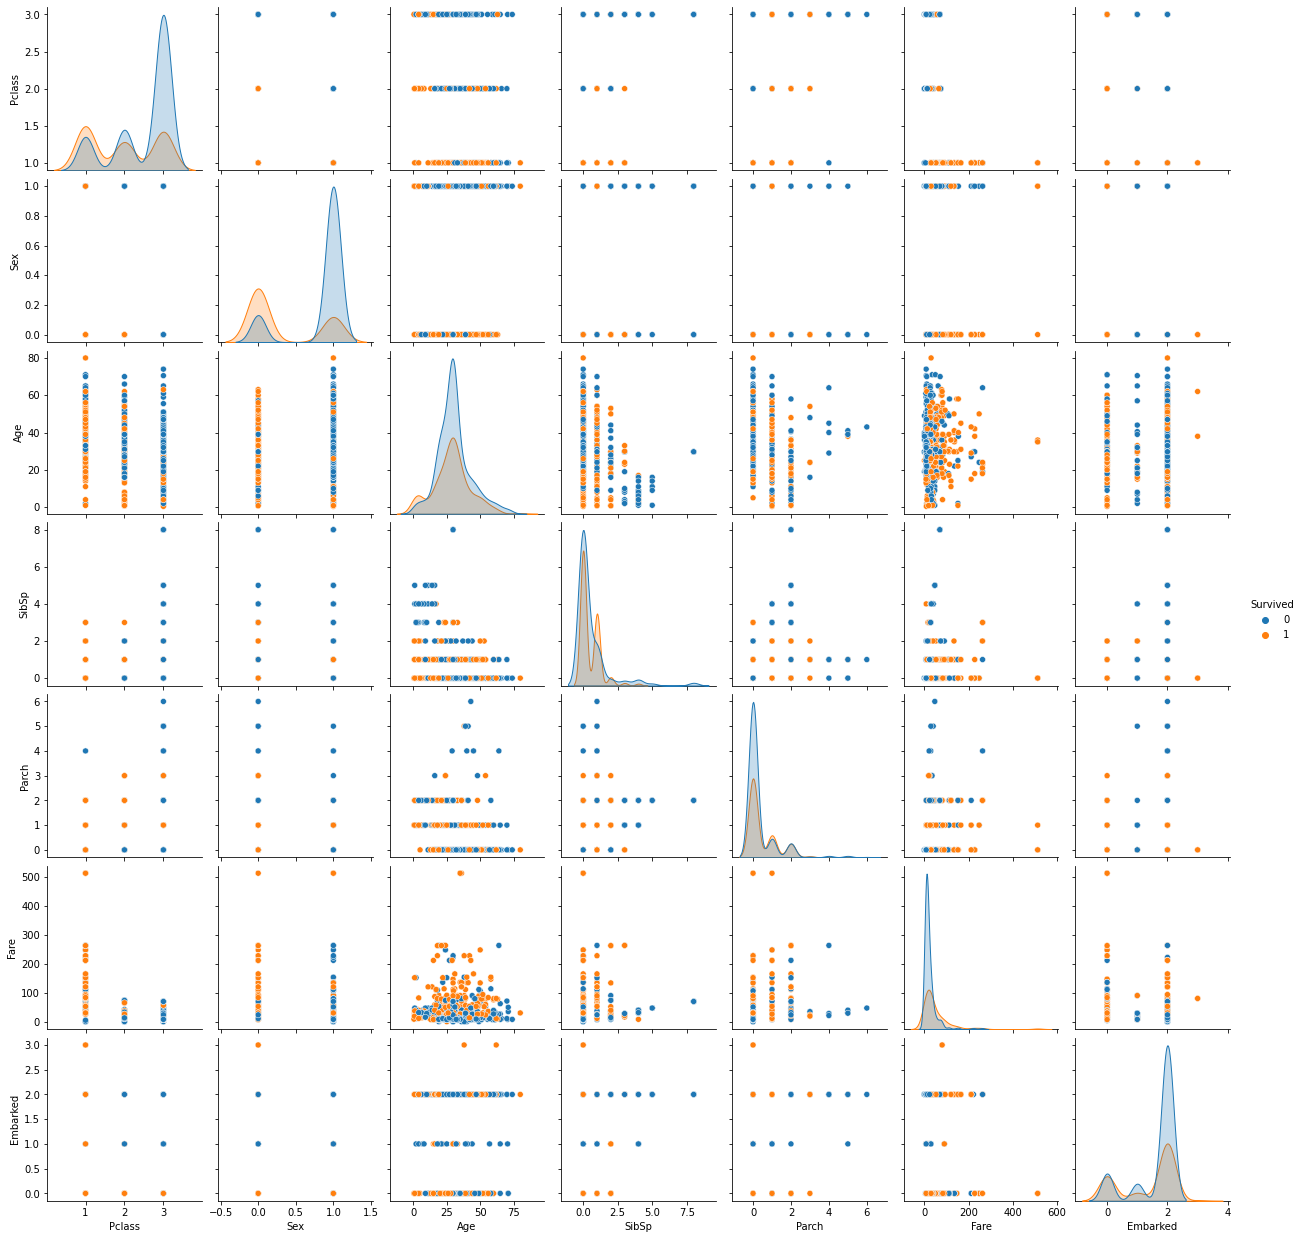

In [32]:
sns.pairplot(df,hue="Survived")

- As most of the variables is categorical will show the value in Numbers.
- Pclass shows that passenger having high fare value are survived more then those having low fare value.
- Pclass with unique value 3 has high Sibling & Spouse values who are not surivived.
- Fare & Age shows non linear relationship.
- Similar kind of obs can be made for other variables.

# Correlation & Heatmap

In [33]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


- Target Col Survived shows high negative correlation with Sex, Age, SibSp & Pclass.
- Target Shows some positive Corr with Fare Col.
- Pclass has high negative Corr with Fare,Age Col
- Sex is High negative corr with Parch & Fare Col
- Similar Obs Can be Seen for remaining independent variables.

<AxesSubplot:>

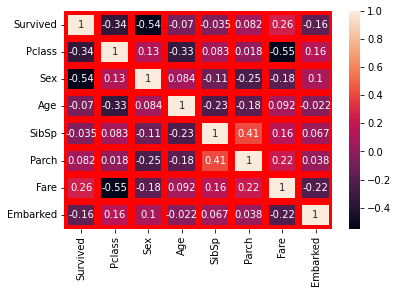

In [34]:
sns.heatmap(corr,annot=True,linewidths=6,linecolor='r')

- Target Col Survived shows high negative correlation with Sex, Age, SibSp & Pclass.
- Target Shows some positive Corr with Fare Col.
- Pclass has high negative Corr with Fare,Age Col
- Sex is High negative corr with Parch & Fare Col
- Similar Obs Can be Seen for remaining independent variables.

# MultiCollinearity Test : Variation Infaltion Factor

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Importing VIF library from sklearn stats module.

In [36]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- Comuting VIF on dataframe

In [37]:
vif_calc()

   VIF Factor  features
0    1.954083  Survived
1    6.108976    Pclass
2    3.699502       Sex
3    4.899083       Age
4    1.580953     SibSp
5    1.615564     Parch
6    1.889511      Fare
7    4.674784  Embarked


- Pclass & Embarked shows Multicollinearity though they are Cat Variable.
- Cat Variables SibSp, Survived, Parch Shows Multicollinearity.

# Outliers Removal & Percentage of Outliers present.

<AxesSubplot:>

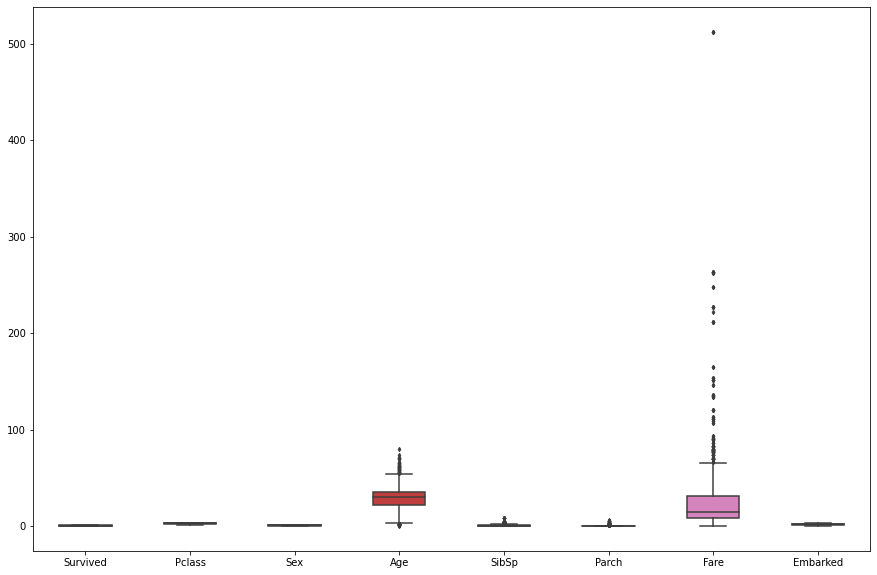

In [38]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- box plot shows high outliers present in Fare Col & Age Col.

# Z-Score for removing Outliers

In [39]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


- Displays the outlier values > 3 standard deviation

In [40]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (820, 8)


- Outliers removed as we can see with no of rows reduced to 820

In [41]:
Data_loss=((891-820)/891)*100 # Computing outlier percentage

- Computing Percentage Outliers removed.

In [42]:
Data_loss

7.968574635241302

- The total Outliers removed is less then 8%  hence the same is removed from the dataset for preparing model.

# Skewness

In [43]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

- Fare Col is Coninous shows high positive skewness and not fall in normal range of 0.5 & -0.5

<AxesSubplot:xlabel='Fare', ylabel='Density'>

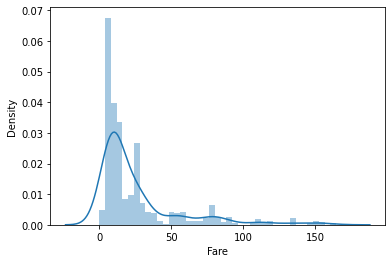

In [44]:
sns.distplot(df['Fare'])

- Disstplot shows right skewed data for Fare Col.

- Sqrt Method is applied to reduce skeness in fare data.

In [45]:
import numpy as np
df['Fare']=np.sqrt(df['Fare'])
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        1.350428
Embarked   -1.257511
dtype: float64

- skeness reduced to 1.35 still not in normal range hence applied sqrt method one more time.

In [46]:
import numpy as np
df['Fare']=np.sqrt(df['Fare'])
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare       -0.004748
Embarked   -1.257511
dtype: float64

- in second time Fare col skewness is not seen and same can seen below in disstplot.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

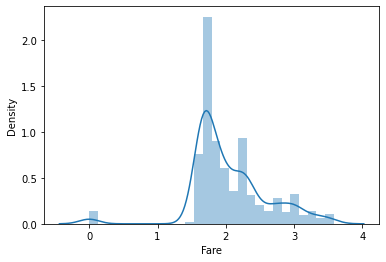

In [47]:
sns.distplot(df['Fare'])

- in second time Fare col skewness is not seen and same can seen below in disstplot.

<AxesSubplot:>

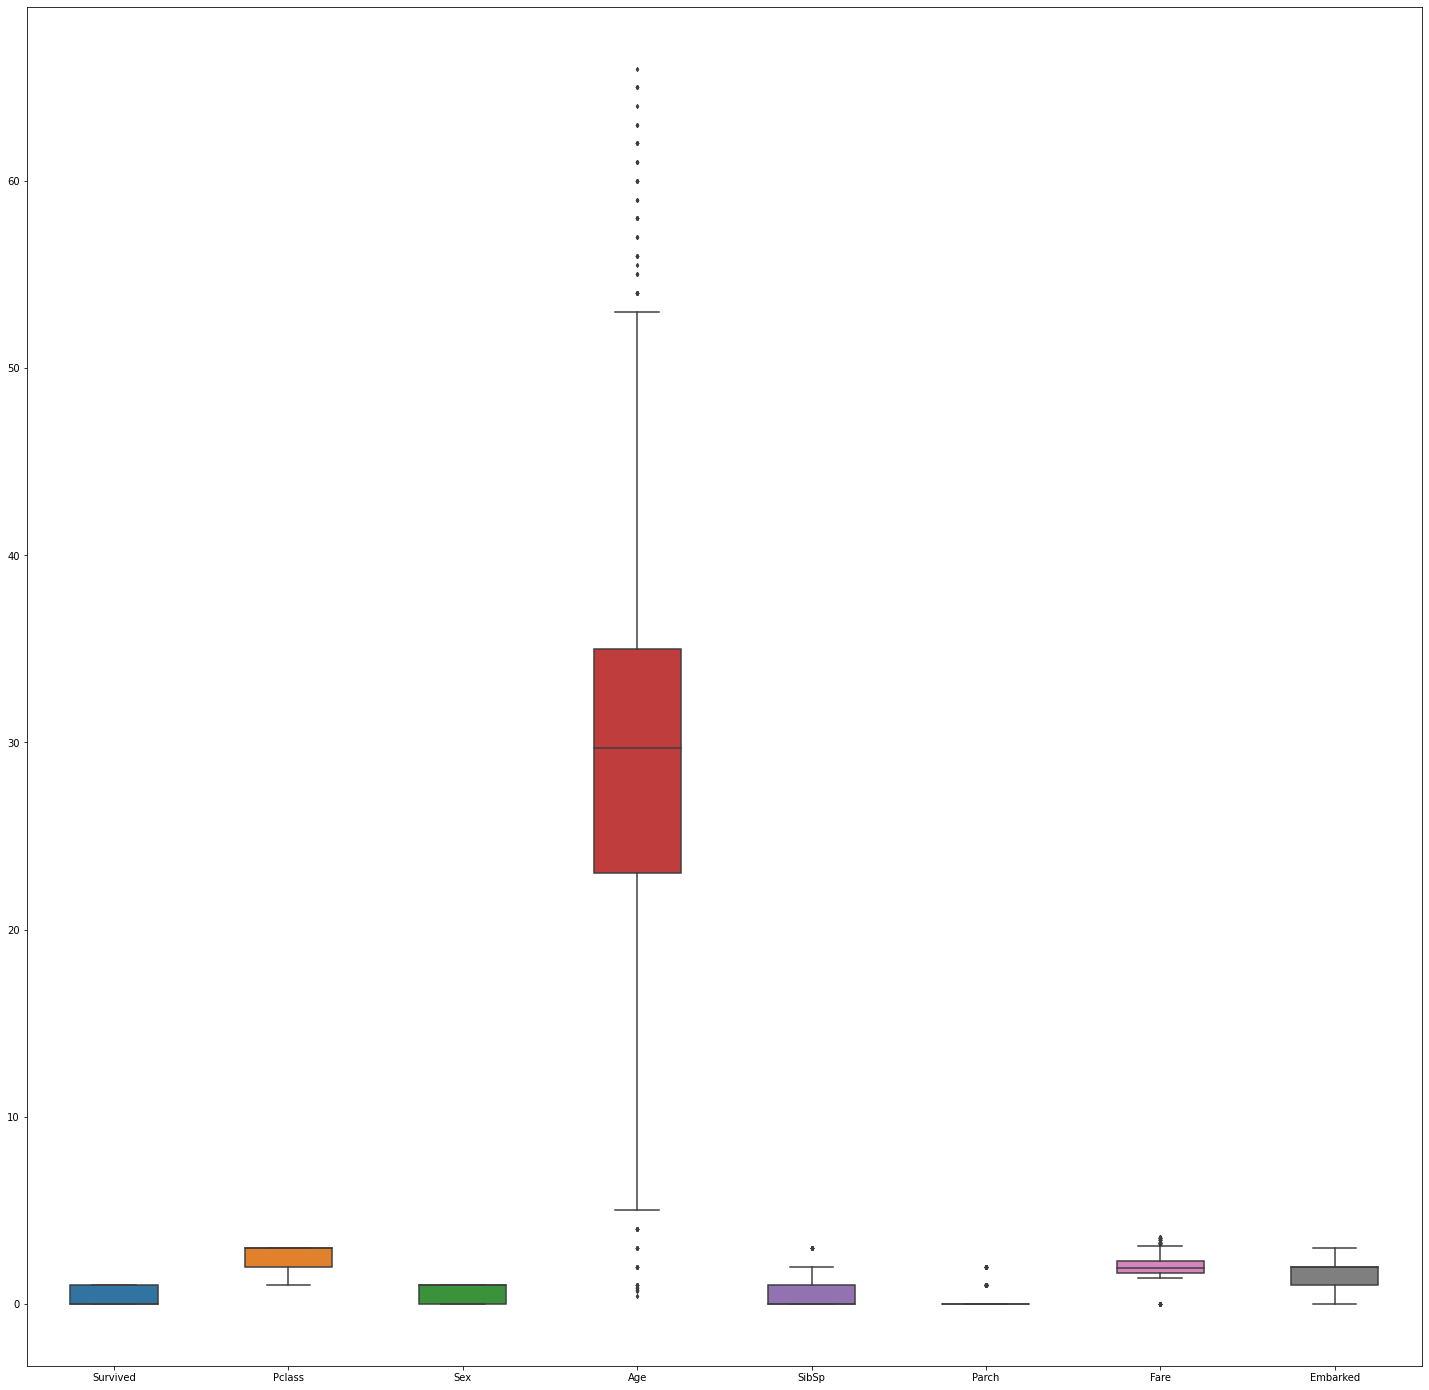

In [48]:
fig, ax =plt.subplots(figsize=(25,25))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

-  Box plot shows outliers reduced after removing outliers & skewness from the dataset.

# Dividing Dataset in x & y variables 

In [49]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

-  the df shows all col with target variable

In [50]:
x = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]

x - independent variable

In [51]:
y = df['Survived']

y - target variable(survived)

In [52]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,1.640909
1,1,0,38.0,1,0,2.905674
2,3,0,26.0,0,0,1.677837
3,1,0,35.0,1,0,2.699440
4,3,1,35.0,0,0,1.684414


x- shows dataset without target variable.

In [53]:
x.shape

(820, 6)

x- shows 820 rows & 6 col

In [54]:
y.shape

(820,)

y - shows 80 rows with target col survived

# Class Imbalance

In [55]:
df['Survived'].value_counts()

0    500
1    320
Name: Survived, dtype: int64

1 - Survived
0 - Not Survived

In [58]:
from sklearn.utils import resample

- importing resample libraries which is used for class balance.

In [59]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

- x-Independent & y-target is merged to make class balance for target variable survived.

In [60]:
nsvd= x[x.Survived==0]
svd = x[x.Survived==1]

- nsvd instance respresents not survived whose value is set to 0.
- svd instance respresents survived whose value is set to 1
- we are balancing 1-Survied Value with 0-Not survived value.
- Hence Upsampling is used for the same.

In [61]:
# upsample minority
dia_upsampled = resample(svd,
                          replace=True, # sample with replacement
                          n_samples=len(nsvd),   # match number in majority
                          random_state=27)  # reproducible results

In [ ]:
- Performed upsampling on 1-Survived value.

In [62]:
upsampled = pd.concat([nsvd, dia_upsampled])

- upsampled Survived value is Concated with 0-Not Survived Value to balance the class.

In [63]:
upsampled.Survived.value_counts()

1    500
0    500
Name: Survived, dtype: int64

-  Survived Value 1 is balanced with not Survived value 0 which is 500

In [123]:
upsampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.000000,1,0,1.640909,0
4,3,1,35.000000,0,0,1.684414,0
5,3,1,29.699118,0,0,1.705378,0
6,1,1,54.000000,0,0,2.683573,0
7,3,1,2.000000,3,1,2.142604,0
...,...,...,...,...,...,...,...
550,1,1,17.000000,0,2,3.245014,1
8,3,0,27.000000,0,2,1.826653,1
381,3,0,1.000000,0,2,1.991879,1
607,1,1,27.000000,0,0,2.350038,1


In [ ]:
- upsampled is the new dataframe where target col is balanced with equal value = 500

In [65]:
x = upsampled[['Pclass','Sex','Age','SibSp','Parch','Fare']]

-Upsampled df is usewd to separate independent variable-x 

In [66]:
y = upsampled['Survived']

-Upsampled df is usewd to separate Target variable(Survuived)-y  

In [67]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,1.640909
4,3,1,35.000000,0,0,1.684414
5,3,1,29.699118,0,0,1.705378
6,1,1,54.000000,0,0,2.683573
7,3,1,2.000000,3,1,2.142604
...,...,...,...,...,...,...
550,1,1,17.000000,0,2,3.245014
8,3,0,27.000000,0,2,1.826653
381,3,0,1.000000,0,2,1.991879
607,1,1,27.000000,0,0,2.350038


- x displays independent variable without target col

In [68]:
x.shape

(1000, 6)

-  x has 1000 rows & 6 Col

In [69]:
y.shape

(1000,)

- 1000 rows & target Col survived.

In [70]:
upsampled['Survived'].value_counts()

1    500
0    500
Name: Survived, dtype: int64

- Target Col shows where Class is balanced

# Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 0.90043348,  0.83706647, -0.56290001,  1.06434444, -0.51006137,
        -0.81660528],
       [ 0.90043348,  0.83706647,  0.46871852, -0.59351294, -0.51006137,
        -0.73850108],
       [ 0.90043348,  0.83706647,  0.04806556, -0.59351294, -0.51006137,
        -0.70086506],
       ...,
       [ 0.90043348, -1.19464826, -2.22936071, -0.59351294,  2.67782219,
        -0.1865188 ],
       [-1.46912832,  0.83706647, -0.16612366, -0.59351294, -0.51006137,
         0.45647539],
       [ 0.90043348, -1.19464826,  0.04806556, -0.59351294,  2.67782219,
         0.14133861]])

- Age & Fare Col & other Cat Variables are not in same range.
- Standard Scaler is applied to x independent variables to make all vaues in same range.

In [74]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  
    

85.15151515151516 at random_state 0
86.66666666666667 at random_state 1
83.03030303030303 at random_state 2
84.84848484848484 at random_state 3
86.36363636363636 at random_state 4
83.93939393939394 at random_state 5
84.54545454545455 at random_state 6
85.75757575757575 at random_state 7
90.0 at random_state 8
86.36363636363636 at random_state 9
86.96969696969697 at random_state 10
90.30303030303031 at random_state 11
85.15151515151516 at random_state 12
80.60606060606061 at random_state 13
86.96969696969697 at random_state 14
86.96969696969697 at random_state 15
87.57575757575758 at random_state 16
87.27272727272727 at random_state 17
83.93939393939394 at random_state 18
85.15151515151516 at random_state 19
86.66666666666667 at random_state 20
85.45454545454545 at random_state 21
84.54545454545455 at random_state 22
85.75757575757575 at random_state 23
86.66666666666667 at random_state 24
87.87878787878788 at random_state 25
86.36363636363636 at random_state 26
83.93939393939394 at ran

In [75]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9133333333333333  on Random_state  150


-Obs : Above code is used to select best random sate out of 200 random state which is 150 with accuracy of 91%

# Splitting dataset in train & test

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 150)

- 70% data used to train the model
- 30% data used to test & predict the model on test data.
- Best random state used is 150

## Logistic Regression

In [77]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


# Obs : Logistic Regression is giving 76% Accuracy

[1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0]
0.8166666666666667
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       136
           1       0.85      0.80      0.83       164

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



- Log Regression Acc = 82%

## Decison tree Classifier

In [78]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

0.9133333333333333
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       136
           1       0.94      0.90      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



- DTC Acc = 91%

## Random Forest Classifier

In [79]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

0.9
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       136
           1       0.90      0.91      0.91       164

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



-RFR    Acc = 90%

## Support Vector Classifier

In [80]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


0.8366666666666667
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       136
           1       0.87      0.82      0.85       164

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



- SVC Acc = 84%

## KNN Classifier

In [81]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

0.83
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       136
           1       0.84      0.85      0.85       164

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



- Knn Acc = 83%

## K-Fold Cross validation

In [82]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [83]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [84]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.807


In [85]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.8779999999999999


In [86]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.891


In [87]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Classifier  CV o/p

0.821


In [88]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.828


- RFR is the best model as it has least diff value between RFR Acc - CV value = 90-89 = 1

## GridSearch CV & Hyperparameter Tuning.

In [89]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [90]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

- Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [91]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [92]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

- Grid search CV applied to the Training Dataset 

In [93]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 100}

- Best Parameter is selected from grid search CV which is 
- 'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','n_estimators': '100'

## Best Model Selected is Random Forest Classifier

In [119]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 9,max_features='sqrt',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.66666666666666


-Obs :  Final Accuracy of the best model = 89.66

## Importing Roc Curve & Ruc Curve Score

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

-Obs : Importing roc_curve & ruc_auc_score metrics from sklearn.

## AUC-ROC Curve

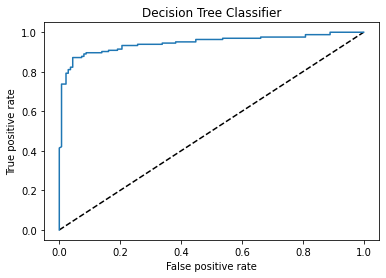

0.8967001434720231

In [120]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

## Exporting Model with joblib libraries

In [101]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

-Obs :  Exporting ML Model as .pkl file with joblib library